In [1]:
# prompt: import all lobraries for data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# prompt: read /content/depression_data.csv

import pandas as pd
df = pd.read_csv('/content/depression_data.csv')


In [3]:
df.head(5)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [5]:
df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [6]:
df.shape

(413768, 16)

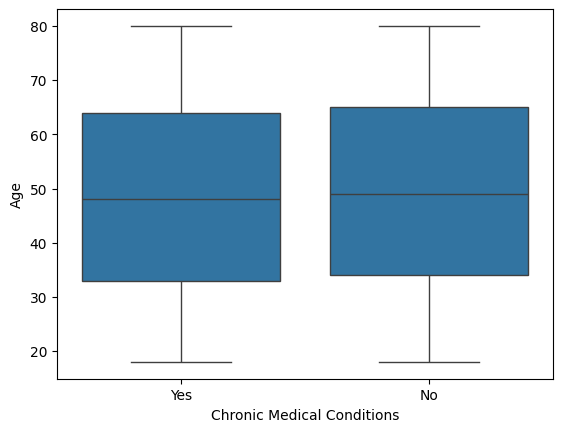

In [7]:
# prompt: create box plot on Chronic Medical Conditions with age

import matplotlib.pyplot as plt
sns.boxplot(x='Chronic Medical Conditions', y='Age', data=df)
plt.show()


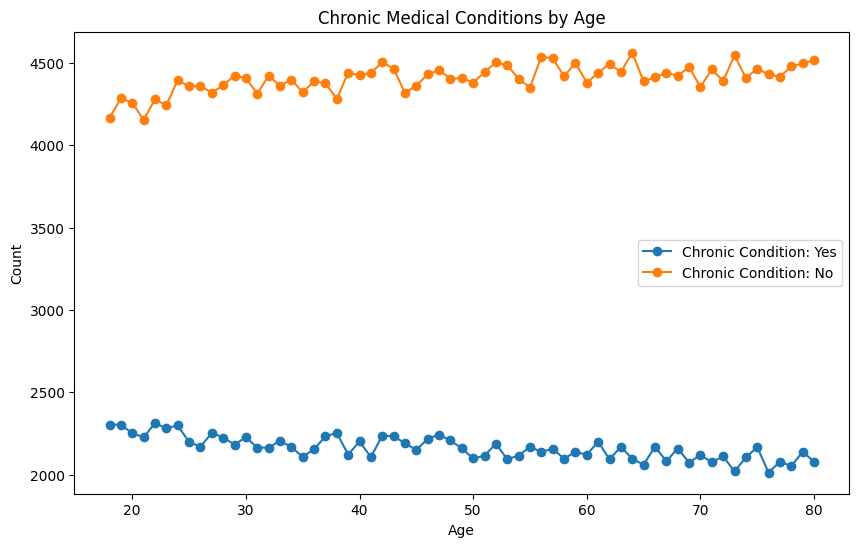

In [8]:
age_chronic_condition = df.groupby(['Age', 'Chronic Medical Conditions']).size().unstack(fill_value=0)

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(age_chronic_condition.index, age_chronic_condition['Yes'], label='Chronic Condition: Yes', marker='o')
plt.plot(age_chronic_condition.index, age_chronic_condition['No'], label='Chronic Condition: No', marker='o')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Chronic Medical Conditions by Age')
plt.legend()

# Display the plot
plt.show()

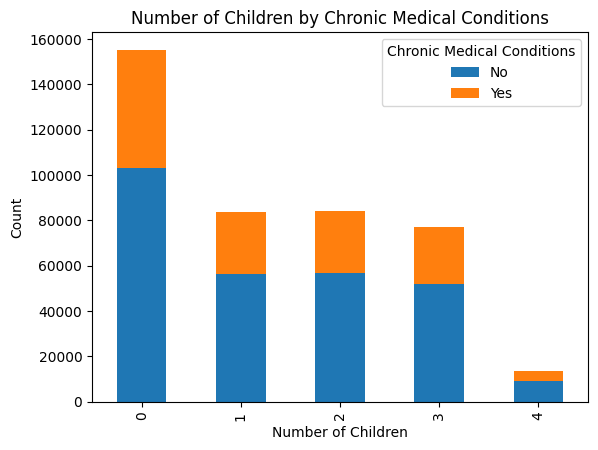

In [9]:
# prompt: create stack plot for  Chronic Medical Conditions stack with count of number of children

import matplotlib.pyplot as plt
chronic_children = df.groupby(['Number of Children', 'Chronic Medical Conditions']).size().unstack()
chronic_children.plot(kind='bar', stacked=True)
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children by Chronic Medical Conditions')
plt.show()


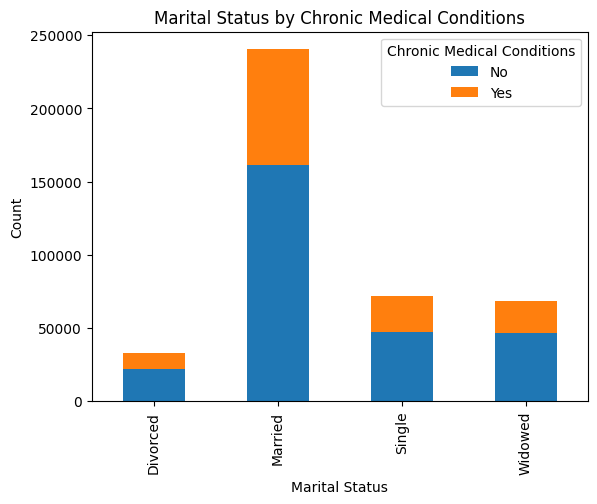

In [10]:
# prompt: Marital Status with Chronic Medical Conditions

import matplotlib.pyplot as plt
marital_chronic = df.groupby(['Marital Status', 'Chronic Medical Conditions']).size().unstack()
marital_chronic.plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status by Chronic Medical Conditions')
plt.show()


In [11]:
# prompt: Marital Status in to numberical with Single as 1, married as 2, divorced as 3 and windows as 4

marital_mapping = {'Single': 1, 'Married': 2, 'Divorced': 3, 'Widowed': 4}
df['Marital Status'] = df['Marital Status'].map(marital_mapping)


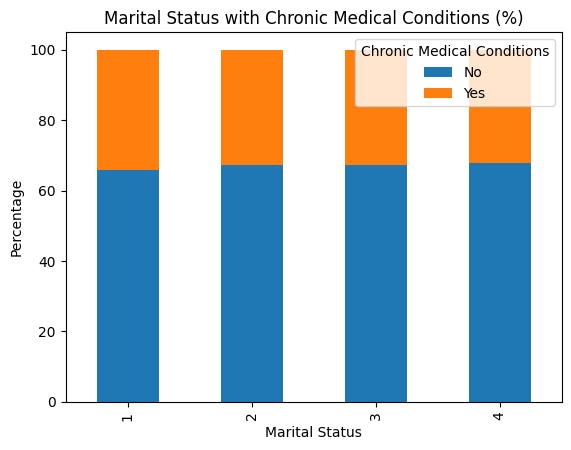

In [12]:
 # prompt: Marital Status with Chronic Medical Conditions %

import matplotlib.pyplot as plt
marital_chronic = df.groupby(['Marital Status', 'Chronic Medical Conditions'])['Chronic Medical Conditions'].count().unstack()
marital_chronic_percent = marital_chronic.div(marital_chronic.sum(axis=1), axis=0) * 100

marital_chronic_percent.plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Marital Status with Chronic Medical Conditions (%)')
plt.show()


In [13]:
marital_chronic_percent

Chronic Medical Conditions,No,Yes
Marital Status,,
1,65.857717,34.142283
2,67.230207,32.769793
3,67.206453,32.793547
4,67.787107,32.212893


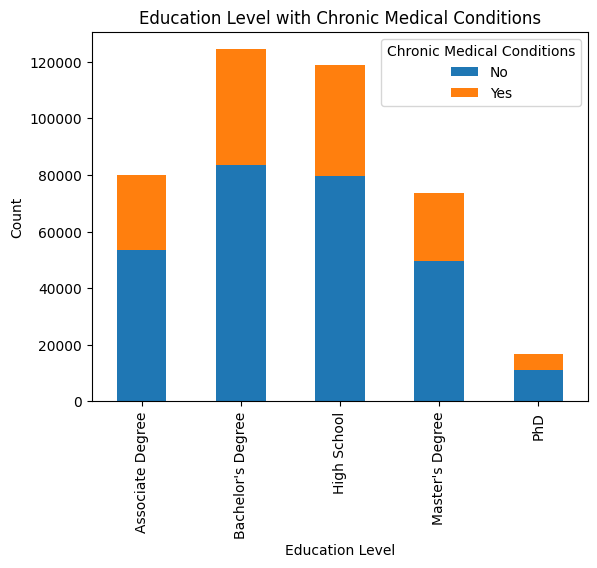

In [14]:
# prompt: Education Level with Chronic Medical Conditions

import matplotlib.pyplot as plt
education_chronic = df.groupby(['Education Level', 'Chronic Medical Conditions'])['Chronic Medical Conditions'].count().unstack()
education_chronic.plot(kind='bar', stacked=True)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level with Chronic Medical Conditions')
plt.show()


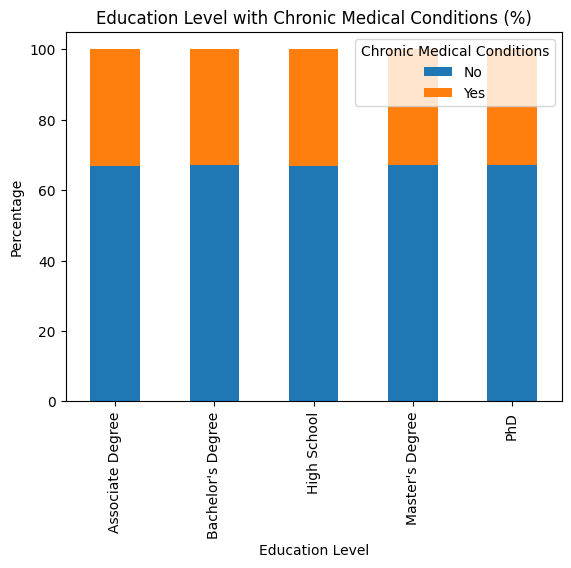

In [15]:
# prompt: Chronic Medical Conditions % lable

import matplotlib.pyplot as plt
education_chronic_percent = education_chronic.div(education_chronic.sum(axis=1), axis=0) * 100

education_chronic_percent.plot(kind='bar', stacked=True)
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.title('Education Level with Chronic Medical Conditions (%)')
plt.show()


In [16]:
education_chronic_percent

Chronic Medical Conditions,No,Yes
Education Level,,
Associate Degree,66.990837,33.009163
Bachelor's Degree,67.200734,32.799266
High School,66.876319,33.123681
Master's Degree,67.296118,32.703882
PhD,67.136459,32.863541


In [17]:
# prompt: Education Level to numerical with High School to 1, Associate Degree to 2, Bachelor's Degree to 3, Master's Degree to 4, PhD to 5

education_mapping = {'High School': 1, "Associate Degree": 2, "Bachelor's Degree": 3, "Master's Degree": 4, 'PhD': 5}
df['Education Level'] = df['Education Level'].map(education_mapping)


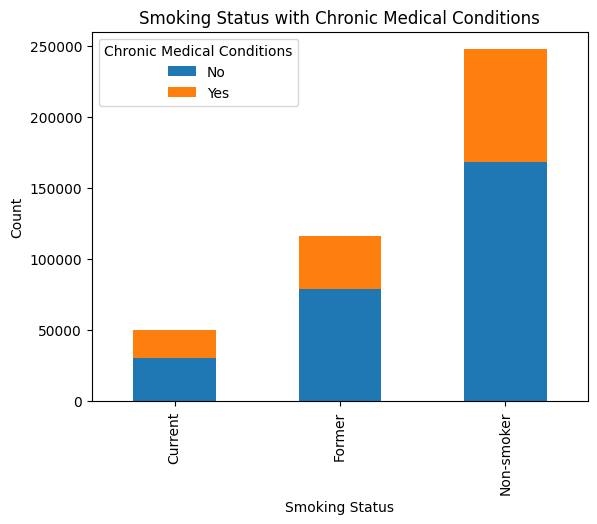

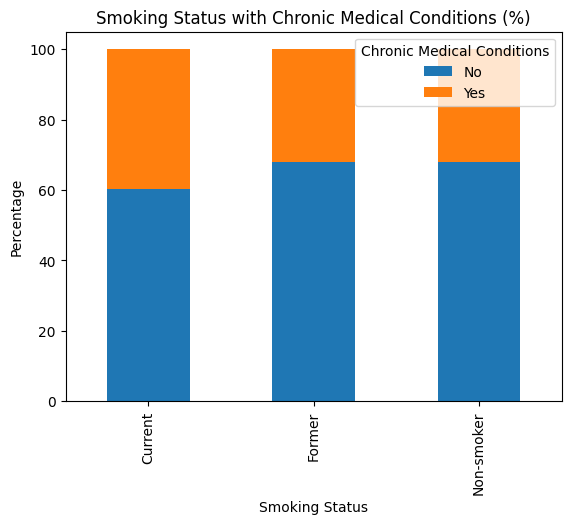

Chronic Medical Conditions,No,Yes
Smoking Status,,
Current,60.365173,39.634827
Former,67.994732,32.005268
Non-smoker,68.014195,31.985805


In [18]:
# prompt: Smoking Status number count & graph %

import matplotlib.pyplot as plt
smoking_chronic = df.groupby(['Smoking Status', 'Chronic Medical Conditions'])['Chronic Medical Conditions'].count().unstack()
smoking_chronic.plot(kind='bar', stacked=True)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Smoking Status with Chronic Medical Conditions')
plt.show()

smoking_chronic_percent = smoking_chronic.div(smoking_chronic.sum(axis=1), axis=0) * 100

smoking_chronic_percent.plot(kind='bar', stacked=True)
plt.xlabel('Smoking Status')
plt.ylabel('Percentage')
plt.title('Smoking Status with Chronic Medical Conditions (%)')
plt.show()

smoking_chronic_percent


In [19]:
# prompt: Smoking Status to numerical with Non-smoker to 1, Former to 2, Current to 3.

smoking_mapping = {'Non-smoker': 1, 'Former': 2, 'Current': 3}
df['Smoking Status'] = df['Smoking Status'].map(smoking_mapping)


In [20]:
# prompt: find na value count

df.isna().sum()


,0
Name,0
Age,0
Marital Status,0
Education Level,0
Number of Children,0
Smoking Status,0
Physical Activity Level,0
Employment Status,0
Income,0
Alcohol Consumption,0


In [21]:
# prompt: find the unique values count in each columns

for col in df.columns:
  print(f"Unique values in column '{col}': {df[col].nunique()}")


Unique values in column 'Name': 196851
Unique values in column 'Age': 63
Unique values in column 'Marital Status': 4
Unique values in column 'Education Level': 5
Unique values in column 'Number of Children': 5
Unique values in column 'Smoking Status': 3
Unique values in column 'Physical Activity Level': 3
Unique values in column 'Employment Status': 2
Unique values in column 'Income': 405282
Unique values in column 'Alcohol Consumption': 3
Unique values in column 'Dietary Habits': 3
Unique values in column 'Sleep Patterns': 3
Unique values in column 'History of Mental Illness': 2
Unique values in column 'History of Substance Abuse': 2
Unique values in column 'Family History of Depression': 2
Unique values in column 'Chronic Medical Conditions': 2


In [22]:
# prompt: Physical Activity Level values counts

df['Physical Activity Level'].value_counts()


,count
Physical Activity Level,
Sedentary,176850
Moderate,158013
Active,78905


In [23]:
# prompt: Physical Activity Level to number with Active to 1, Moderate to 2, Sedentary 3

activity_mapping = {'Active': 1, 'Moderate': 2, 'Sedentary': 3}
df['Physical Activity Level'] = df['Physical Activity Level'].map(activity_mapping)


In [24]:
 df['Employment Status'].value_counts()

,count
Employment Status,
Employed,265659
Unemployed,148109


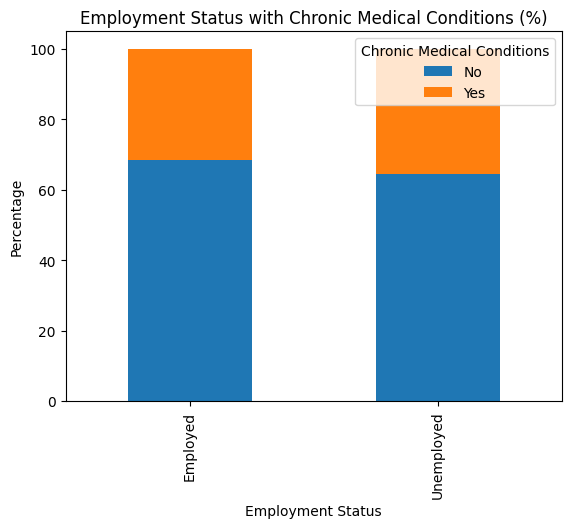

Chronic Medical Conditions,No,Yes
Employment Status,,
Employed,68.569482,31.430518
Unemployed,64.412021,35.587979


In [25]:
# prompt: Employment Status with Chronic Medical Conditions counts in %

import matplotlib.pyplot as plt
employment_chronic = df.groupby(['Employment Status', 'Chronic Medical Conditions'])['Chronic Medical Conditions'].count().unstack()
employment_chronic_percent = employment_chronic.div(employment_chronic.sum(axis=1), axis=0) * 100

employment_chronic_percent.plot(kind='bar', stacked=True)
plt.xlabel('Employment Status')
plt.ylabel('Percentage')
plt.title('Employment Status with Chronic Medical Conditions (%)')
plt.show()

employment_chronic_percent


In [26]:
# prompt: Employment Status to number with Employed to 1 and Unemployed to 2

employment_mapping = {'Employed': 1, 'Unemployed': 2}
df['Employment Status'] = df['Employment Status'].map(employment_mapping)


In [27]:
# prompt: Chronic Medical Conditions to numerical with no 0 and yes to 1

df['Chronic Medical Conditions'] = df['Chronic Medical Conditions'].map({'No': 0, 'Yes': 1})


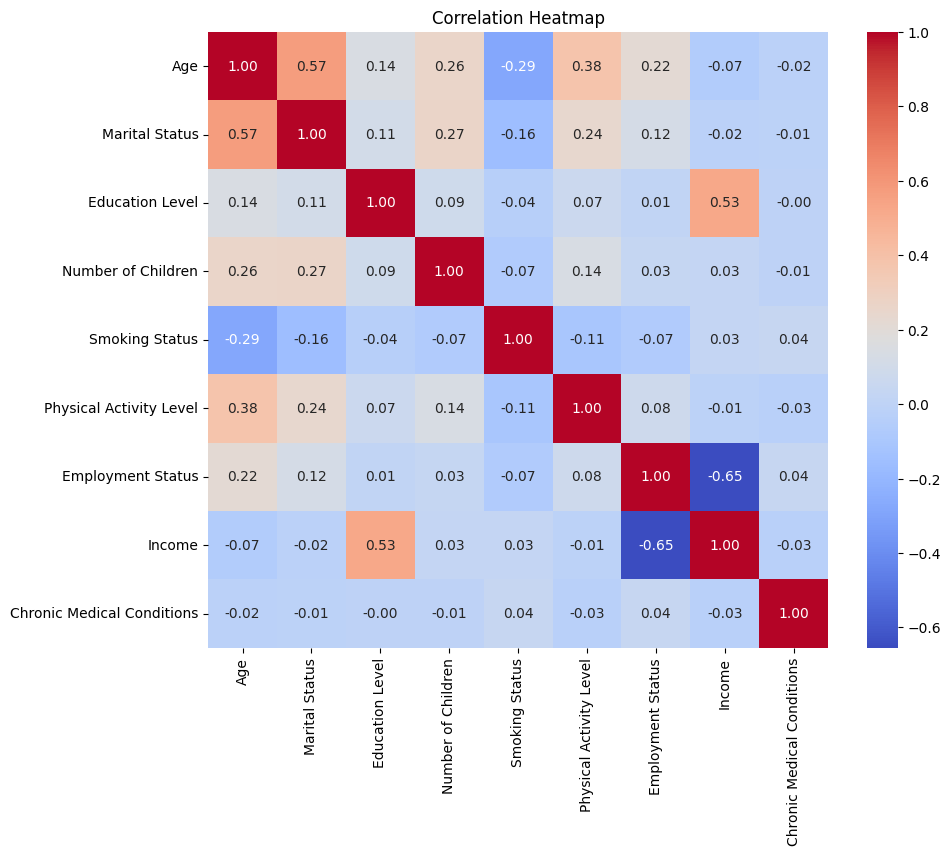

In [28]:
# prompt: corelatetion for numerical columns with heatmap

import matplotlib.pyplot as plt
import seaborn as sns # Added import statement for seaborn

# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr() # Select only numeric columns

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [29]:
df['Chronic Medical Conditions'].value_counts()

,count
Chronic Medical Conditions,
0,277561
1,136207


In [30]:
# prompt: make dataset balance with equal distribuation of Chronic Medical Conditions

import pandas as pd
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Chronic Medical Conditions'] == 0]
df_minority = df[df['Chronic Medical Conditions'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,             # Sample with replacement
                                 n_samples=len(df_majority), # Match number in majority class
                                 random_state=42)         # Reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_balanced['Chronic Medical Conditions'].value_counts())


Chronic Medical Conditions
0    277561
1    277561
Name: count, dtype: int64


In [31]:
# prompt: drop Name

df_balanced = df_balanced.drop('Name', axis=1)


In [32]:
# prompt: create logestic regression to predict Chronic Medical Conditions

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming 'Chronic Medical Conditions' is the target variable and the rest are features
X = df_balanced.drop('Chronic Medical Conditions', axis=1)
y = df_balanced['Chronic Medical Conditions']

# Convert categorical features to numerical using one-hot encoding



In [33]:
X.nunique()

,0
Age,63
Marital Status,4
Education Level,5
Number of Children,5
Smoking Status,3
Physical Activity Level,3
Employment Status,2
Income,388170
Alcohol Consumption,3
Dietary Habits,3


In [34]:
X=pd.get_dummies(X)

Accuracy: 0.5135780229678001
              precision    recall  f1-score   support

           0       0.51      0.62      0.56     55564
           1       0.52      0.41      0.45     55461

    accuracy                           0.51    111025
   macro avg       0.51      0.51      0.51    111025
weighted avg       0.51      0.51      0.51    111025



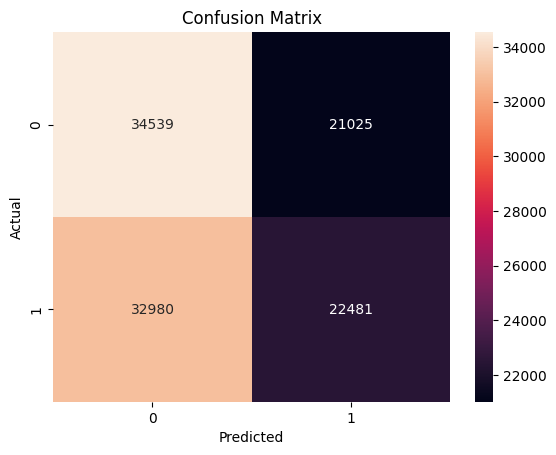

In [35]:

# Convert categorical features to numerical using one-hot encoding

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8050078811078586
              precision    recall  f1-score   support

           0       0.84      0.76      0.80     55564
           1       0.78      0.85      0.81     55461

    accuracy                           0.81    111025
   macro avg       0.81      0.81      0.80    111025
weighted avg       0.81      0.81      0.80    111025



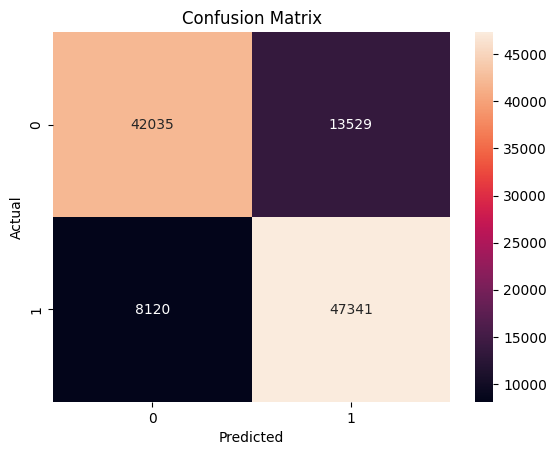

In [36]:
# prompt: check with ramdon forrest model

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
model = RandomForestClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


                           feature  importance
7                           Income    0.390472
0                              Age    0.275883
3               Number of Children    0.061581
2                  Education Level    0.060069
4                   Smoking Status    0.032159
1                   Marital Status    0.030994
5          Physical Activity Level    0.030126
14             Sleep Patterns_Fair    0.008887
19   History of Substance Abuse_No    0.008876
20  History of Substance Abuse_Yes    0.008818


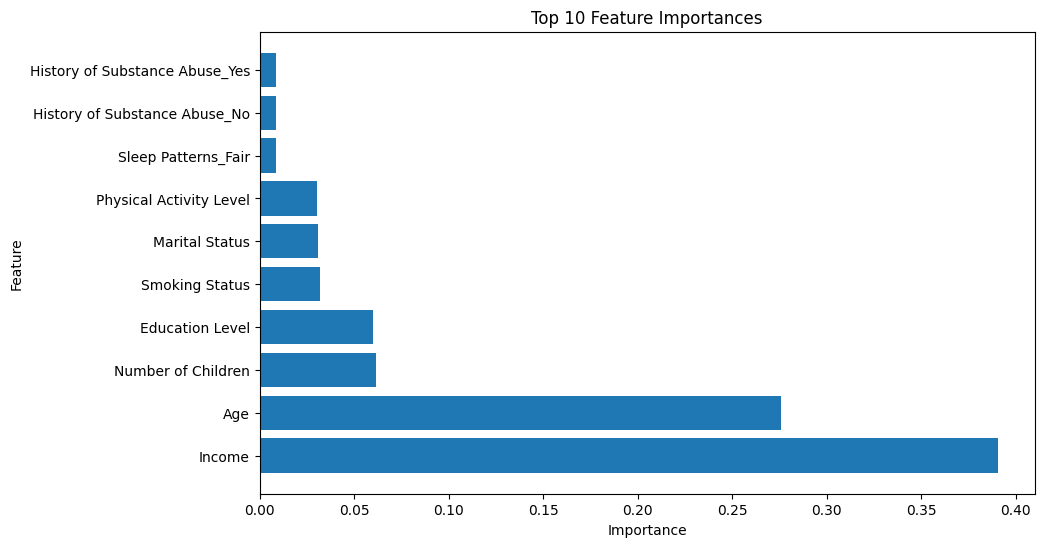

In [37]:
# prompt: find best feature

import pandas as pd
import matplotlib.pyplot as plt
# Get feature importances from the trained Random Forest model
importances = model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top N most important features (adjust N as needed)
N = 10
print(feature_importances.head(N))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'][:N], feature_importances['importance'][:N])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances'.format(N))
plt.show()
